# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [22]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [36]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # reate endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ebon
Processing Record 2 of Set 1 | phulbani
Processing Record 3 of Set 1 | humberto de campos
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | mount gambier
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | trairi
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | nova vicosa
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | tanjungtiram
Processing Record 15 of Set 1 | fortaleza
Processing Record 16 of Set 1 | smithers
Processing Record 17 of Set 1 | barra de santo antonio
Processing Record 18 of Set 1 | afaahiti
Processing Record 19 of Set 1 | rio grande
Processing Record 20 of Set 1 | sortavala
Processing Record 21 of Set 1 | hilo
Pr

In [38]:
city_weather

{'coord': {'lon': 59.5289, 'lat': 22.5667},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 30.96,
  'feels_like': 34.04,
  'temp_min': 30.96,
  'temp_max': 30.96,
  'pressure': 998,
  'humidity': 57,
  'sea_level': 998,
  'grnd_level': 997},
 'visibility': 10000,
 'wind': {'speed': 5.02, 'deg': 205, 'gust': 5.99},
 'clouds': {'all': 100},
 'dt': 1693004464,
 'sys': {'country': 'OM', 'sunrise': 1693014156, 'sunset': 1693059933},
 'timezone': 14400,
 'id': 286245,
 'name': 'Sur',
 'cod': 200}

In [39]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [40]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ebon,4.5820,168.6964,28.61,76,100,6.49,MH,1693004334
1,phulbani,20.4667,84.2333,21.89,93,91,1.82,IN,1693004334
2,humberto de campos,-2.5983,-43.4611,25.07,87,9,2.94,BR,1693004334
3,port alfred,-33.5906,26.8910,11.21,88,59,2.68,ZA,1693004335
4,mount gambier,-37.8333,140.7667,9.20,71,89,2.95,AU,1693004335


In [45]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [47]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ebon,4.5820,168.6964,28.61,76,100,6.49,MH,1693004334
1,phulbani,20.4667,84.2333,21.89,93,91,1.82,IN,1693004334
2,humberto de campos,-2.5983,-43.4611,25.07,87,9,2.94,BR,1693004334
3,port alfred,-33.5906,26.8910,11.21,88,59,2.68,ZA,1693004335
4,mount gambier,-37.8333,140.7667,9.20,71,89,2.95,AU,1693004335


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

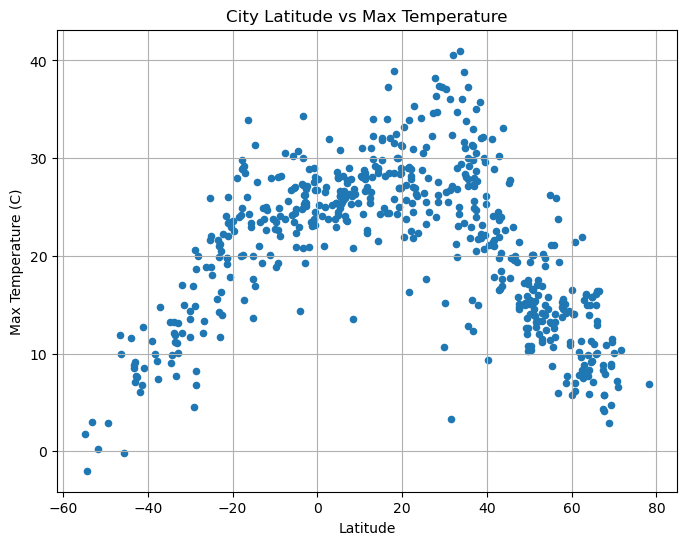

In [50]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", grid=True,x='Lat',y='Max Temp',
                  title=f"City Latitude vs Max Temperature",
                  figsize=(8,6))

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

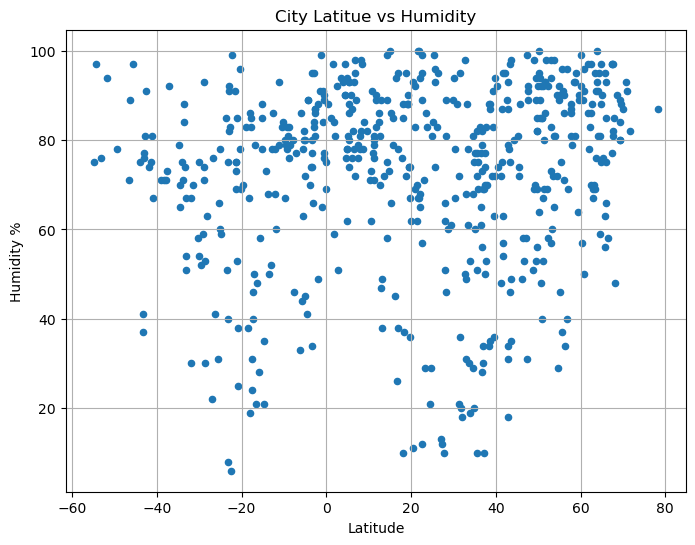

In [52]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", grid=True, x='Lat', y='Humidity',
                  title=f"City Latitue vs Humidity",
                  figsize=(8,6))

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity %')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

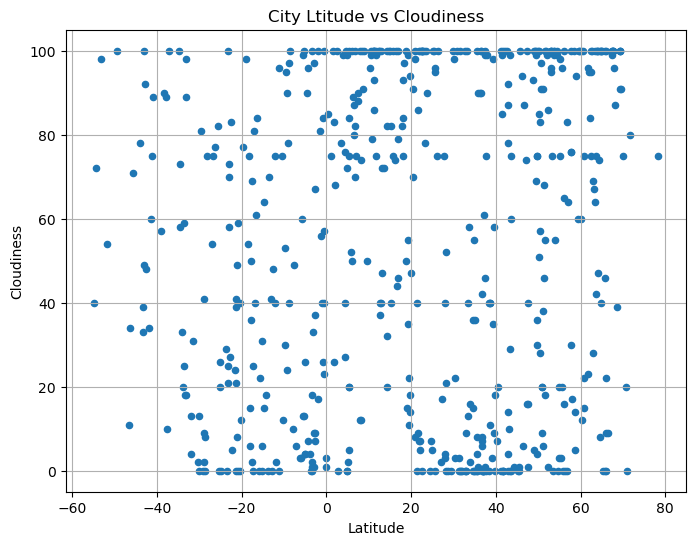

In [53]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", grid = True, x = 'Lat', y = 'Cloudiness',
                  title=f"City Ltitude vs Cloudiness",
                  figsize=(8,6))

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

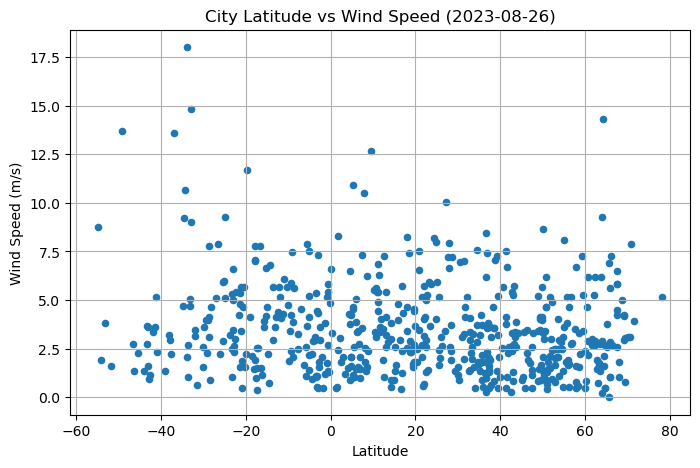

In [54]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", grid=True,x='Lat',y='Wind Speed',
                  title=f"City Latitude vs Wind Speed ({pd.to_datetime('today').date()})",
                  figsize=(8,5))

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [65]:
# Define a function to create Linear Regression plots
def linearplot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values*slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    a=int(input('Where do you want to put the equation on this graph? x-coordinate ='))
    b=int(input('y-coordinate ='))
    plt.annotate(line_eq, (a,b), fontsize=15, color="red")
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel('Latitude')
    print(f"The r-squared is: {rvalue**2}")

In [56]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ebon,4.5820,168.6964,28.61,76,100,6.49,MH,1693004334
1,phulbani,20.4667,84.2333,21.89,93,91,1.82,IN,1693004334
10,ilulissat,69.2167,-51.1000,4.72,84,91,2.95,GL,1693004336
12,tanjungtiram,4.0613,98.3699,23.78,93,99,1.48,ID,1693004337
14,smithers,54.7804,-127.1743,26.18,29,0,3.09,CA,1693004337


In [57]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,humberto de campos,-2.5983,-43.4611,25.07,87,9,2.94,BR,1693004334
3,port alfred,-33.5906,26.8910,11.21,88,59,2.68,ZA,1693004335
4,mount gambier,-37.8333,140.7667,9.20,71,89,2.95,AU,1693004335
5,adamstown,-25.0660,-130.1015,18.89,60,26,5.98,PN,1693004335
6,port-aux-francais,-49.3500,70.2167,2.93,78,100,13.72,TF,1693004335


###  Temperature vs. Latitude Linear Regression Plot

Where do you want to put the equation on this graph? x-coordinate = 10
y-coordinate = 10


The r-squared is: 0.5199733926200039


<function matplotlib.pyplot.show(close=None, block=None)>

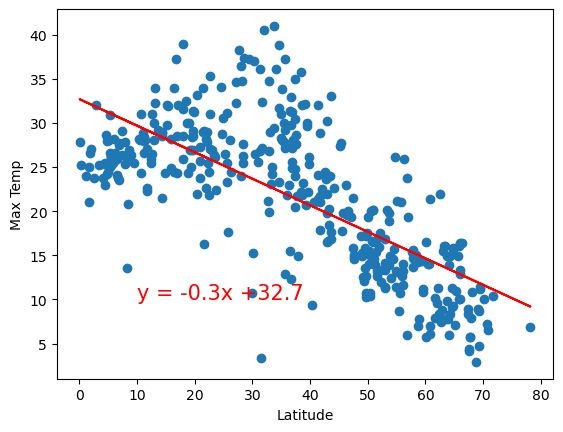

In [66]:
# Linear regression on Northern Hemisphere
linearplot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.ylabel('Max Temp')
plt.show

Where do you want to put the equation on this graph? x-coordinate = -50
y-coordinate = 25


The r-squared is: 0.7058190705382887


<function matplotlib.pyplot.show(close=None, block=None)>

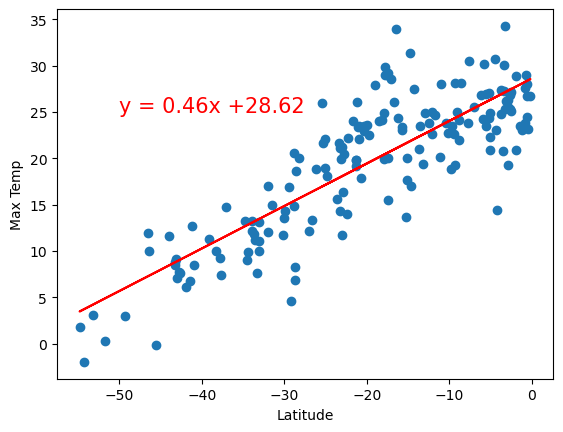

In [72]:
# Linear regression on Southern Hemisphere
linearplot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.ylabel('Max Temp')
plt.show

**Discussion about the linear relationship: In general, countries which are closer to the equatoe (Lat = 0) have higher temperature. The trend seems to be stronger for southern hemisphere (higher R-squared value)

### Humidity vs. Latitude Linear Regression Plot

Where do you want to put the equation on this graph? x-coordinate = 60
y-coordinate = 70


The r-squared is: 0.0037179798398487133


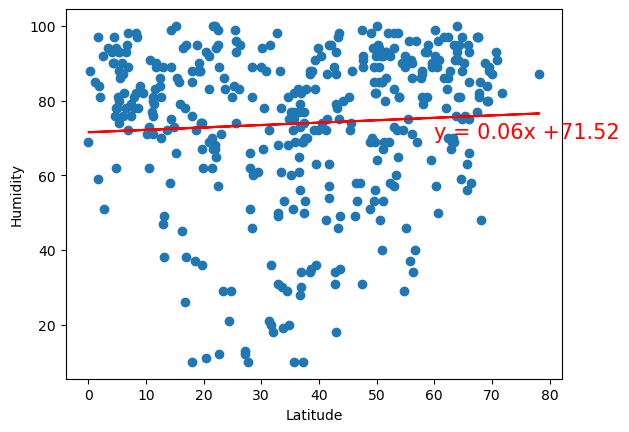

In [74]:
# Northern Hemisphere
linearplot(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
plt.ylabel('Humidity')
plt.show()

Where do you want to put the equation on this graph? x-coordinate = -50
y-coordinate = 60


The r-squared is: 0.002687496405672443


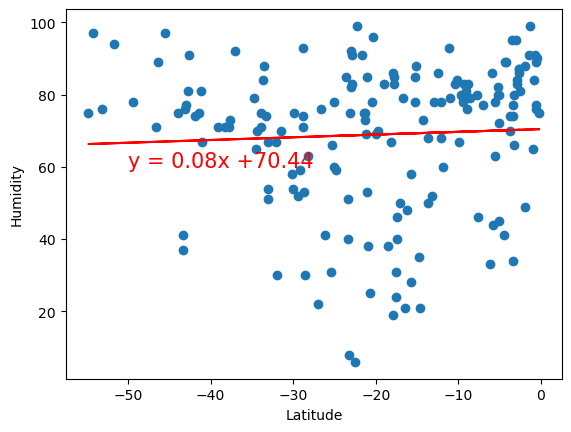

In [76]:
# Southern Hemisphere
linearplot(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship: There is no apparent relationship between Latitude and Humidity for cities in both southern and northern hemisphere. The R-squared values for both are very low

### Cloudiness vs. Latitude Linear Regression Plot

Where do you want to put the equation on this graph? x-coordinate = 0
y-coordinate = 60


The r-squared is: 0.00018101555670768025


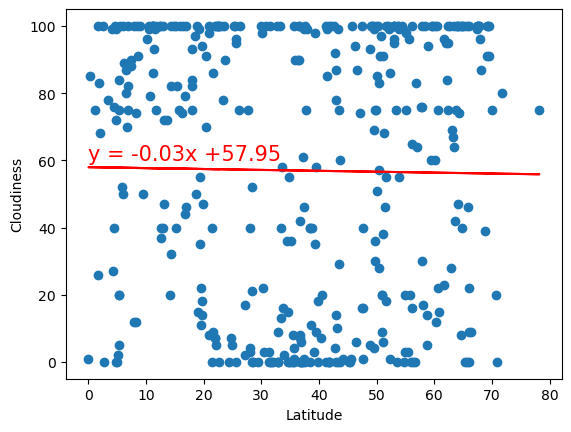

In [78]:
# Northern Hemisphere
linearplot(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
plt.ylabel('Cloudiness')
plt.show()

Where do you want to put the equation on this graph? x-coordinate = -30
y-coordinate = 60


The r-squared is: 0.024435883899706228


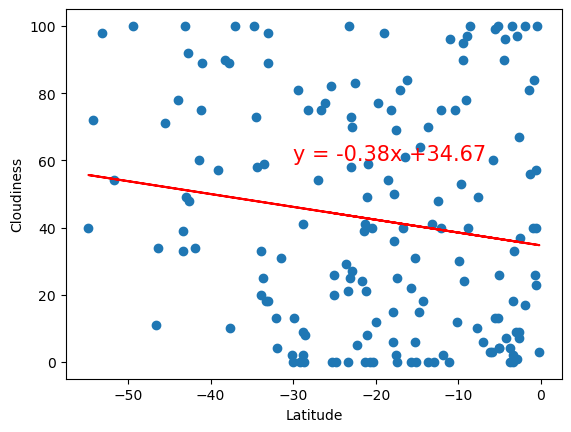

In [79]:
# Southern Hemisphere
linearplot(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship: There is no apparent relationship between Latitude and Humidity for cities in both southern and northern hemisphere. The R-squared values for both are very low and they all have some extreme values of 0 or 100 cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

Where do you want to put the equation on this graph? x-coordinate = 20
y-coordinate = 10


The r-squared is: 0.006035652789424708


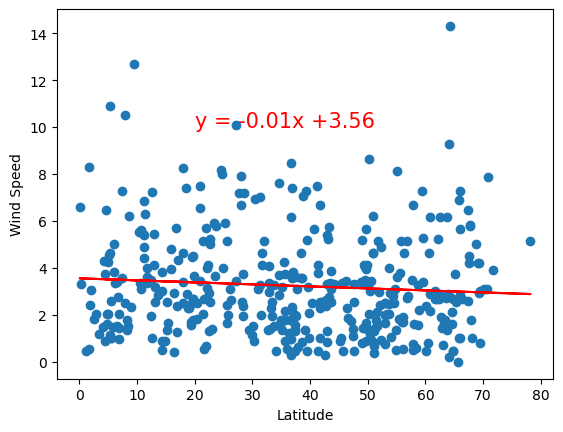

In [81]:
# Northern Hemisphere
linearplot(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
plt.ylabel('Wind Speed')
plt.show()

Where do you want to put the equation on this graph? x-coordinate = -10
y-coordinate = 10


The r-squared is: 0.021189734376131007


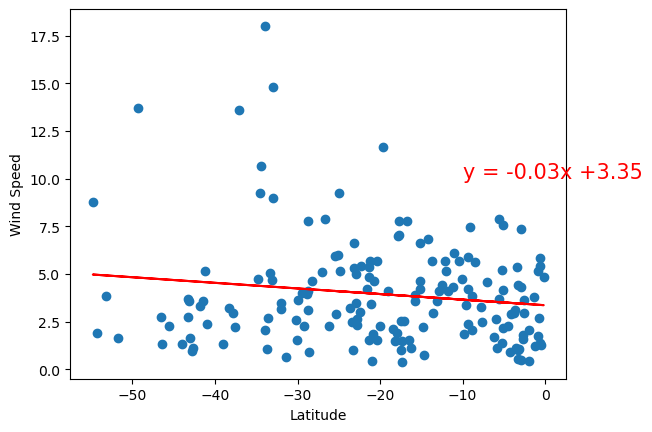

In [84]:
# Southern Hemisphere
linearplot(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship: There is no apparent relationship between Latitude and Humidity for cities in both southern and northern hemisphere. The R-squared values for both are very low 